In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             544 non-null    int64 
 1   area              544 non-null    int64 
 2   bedrooms          544 non-null    int64 
 3   bathrooms         544 non-null    int64 
 4   stories           544 non-null    int64 
 5   mainroad          544 non-null    object
 6   guestroom         544 non-null    object
 7   basement          544 non-null    object
 8   hotwaterheating   544 non-null    object
 9   airconditioning   544 non-null    object
 10  parking           544 non-null    int64 
 11  prefarea          544 non-null    object
 12  furnishingstatus  544 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.4+ KB


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

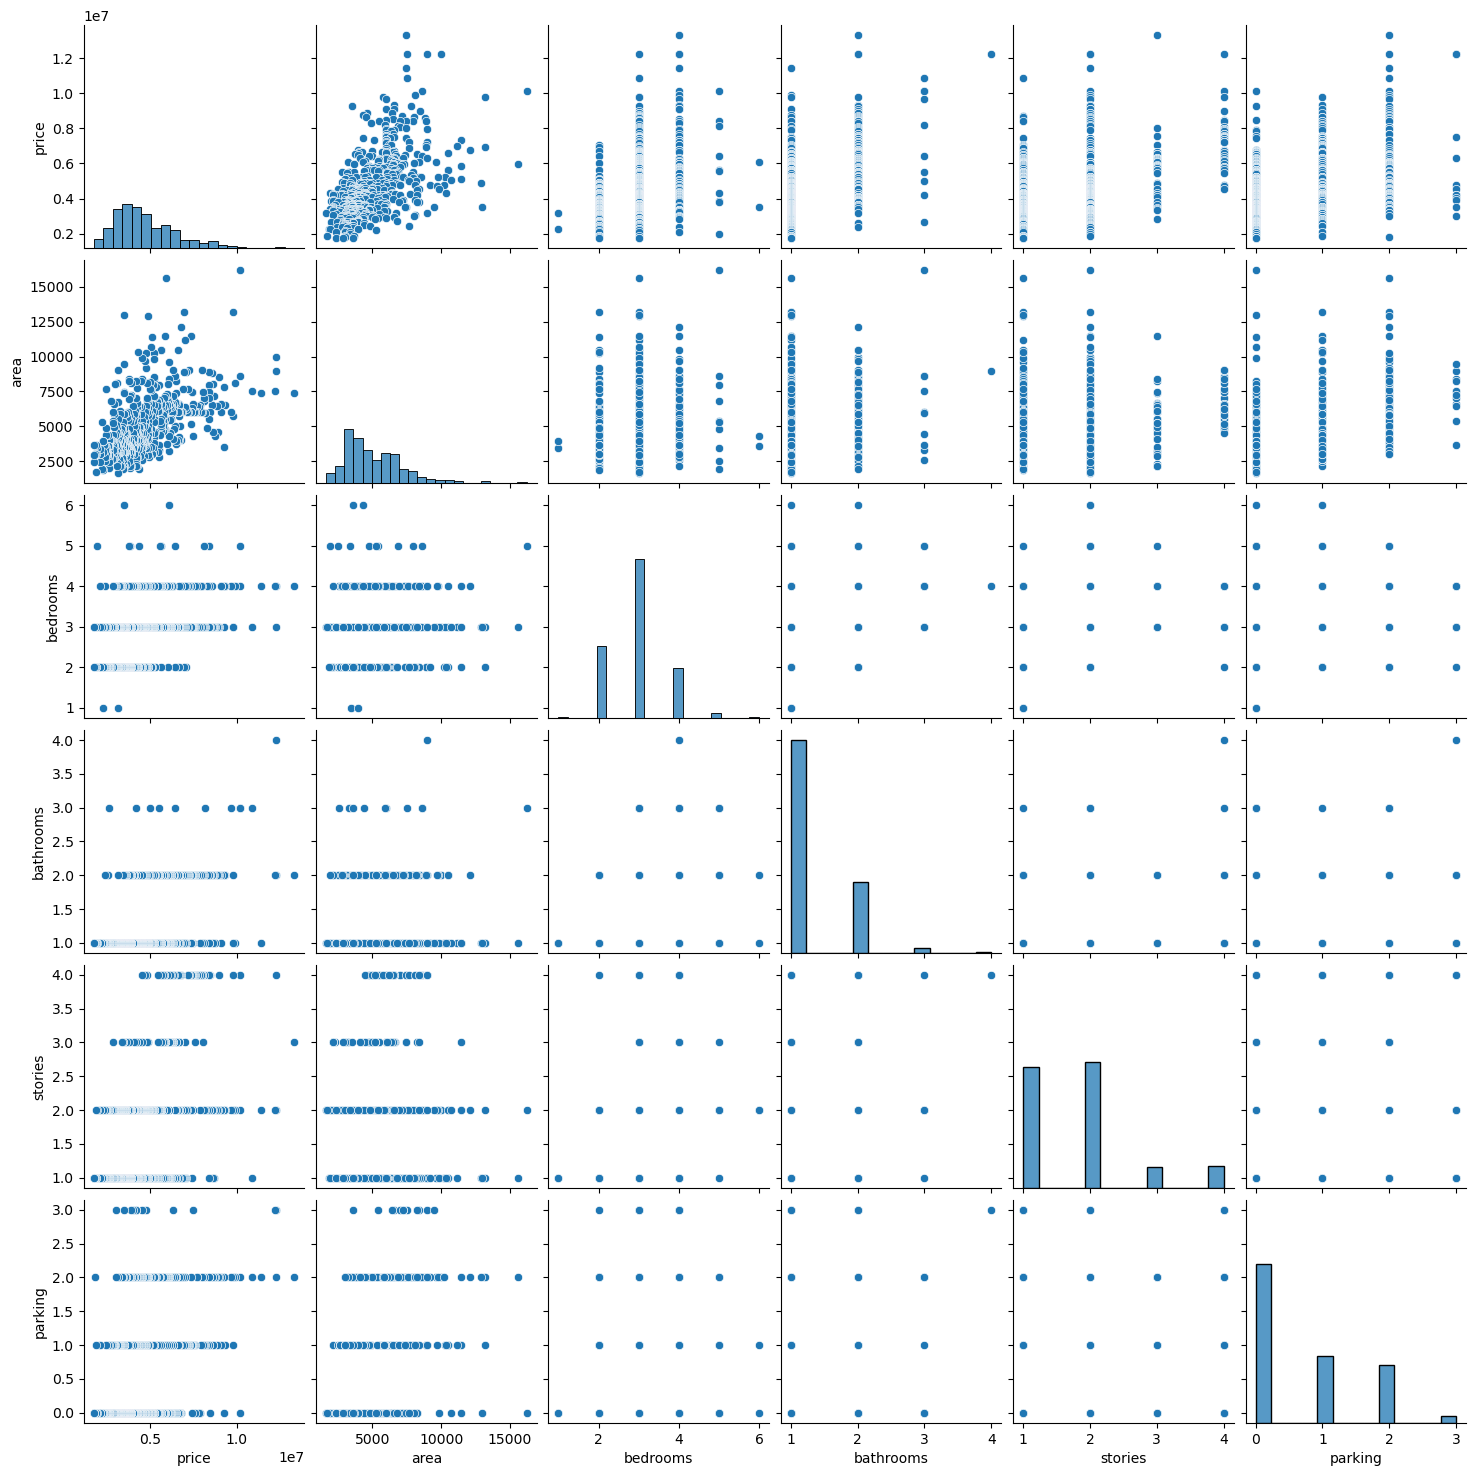

In [4]:
sns.pairplot(df)
plt.show()

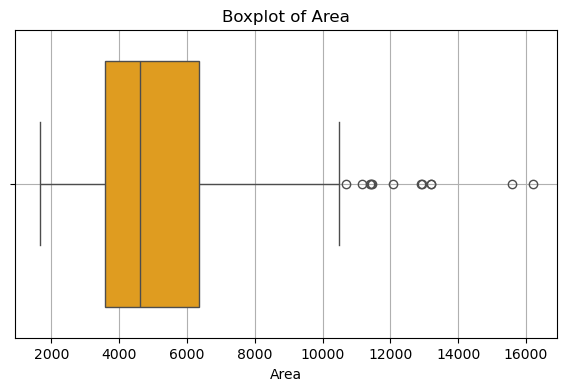

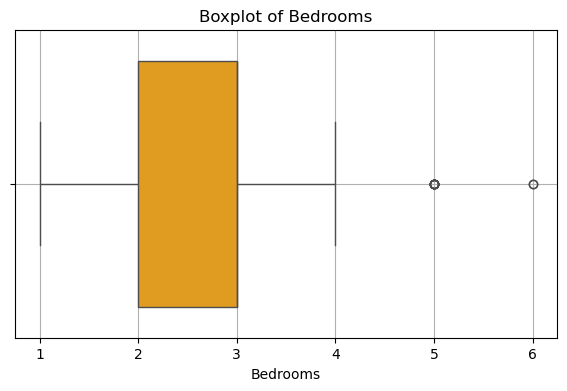

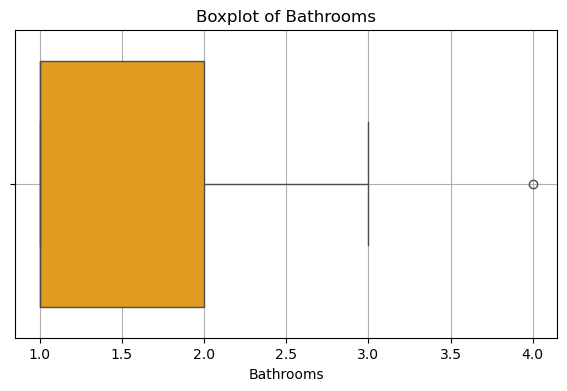

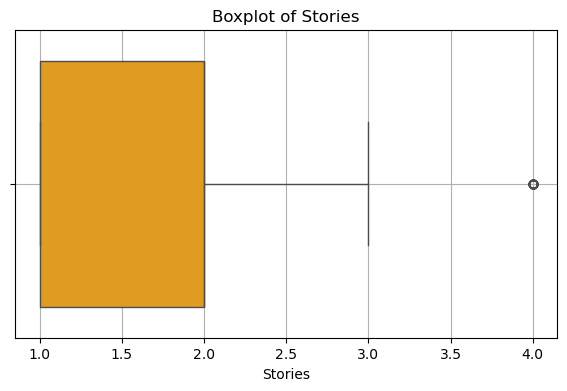

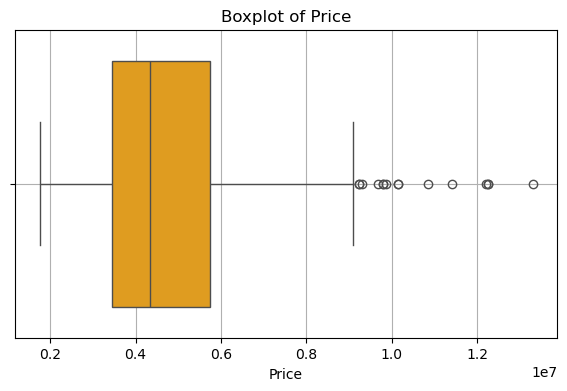

In [69]:
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'price']

# Plot individual boxplot for each
for feature in features:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x=df[feature], color='orange')
    plt.title(f"Boxplot of {feature.capitalize()}")
    plt.xlabel(feature.capitalize())
    plt.grid(True)
    plt.show()


In [74]:
def remove_outliers_iqr_columnwise(df, column, multiplier=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - multiplier * IQR
    upper = Q3 + multiplier * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

In [75]:
for col in features:
    df_cleaned = remove_outliers_iqr_columnwise(df_cleaned, col, multiplier=1.0)  # more strict than 1.5

# ===== Compare shape =====
print("Original shape:", df.shape)
print("After stricter IQR-based cleaning:", df_cleaned.shape)

Original shape: (544, 13)
After stricter IQR-based cleaning: (339, 13)


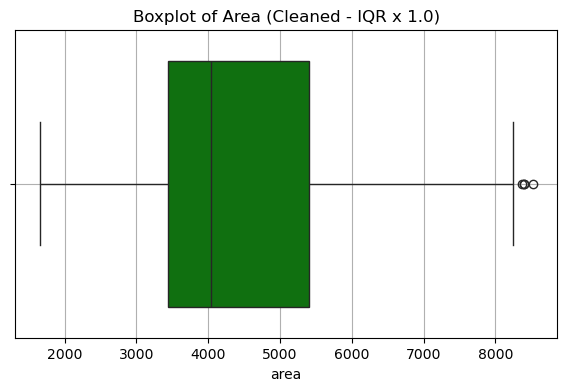

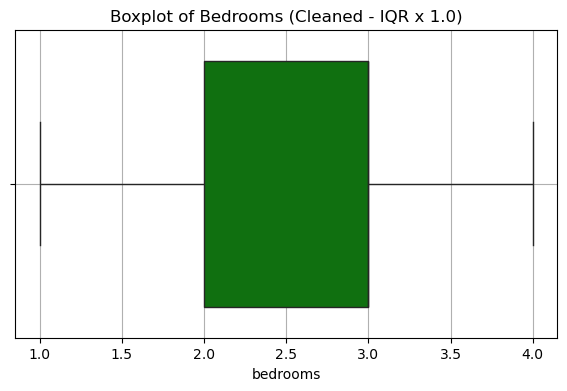

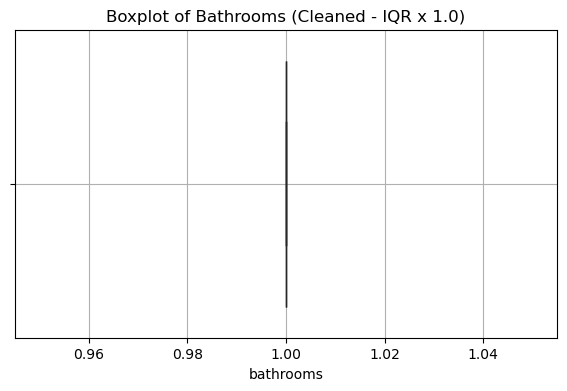

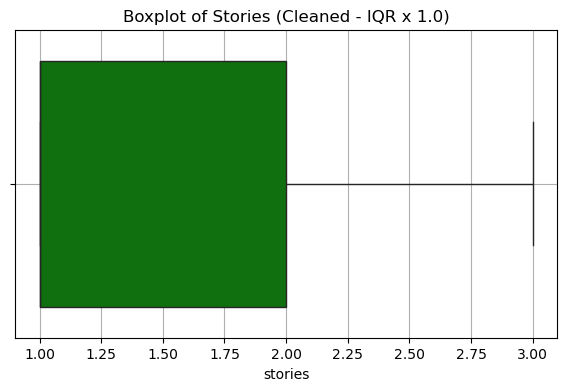

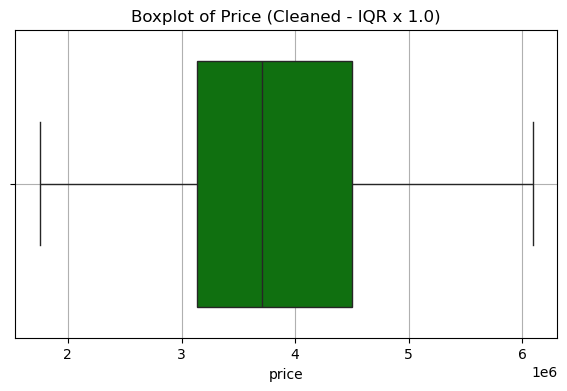

In [77]:
for col in features:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x=df_cleaned[col], color='green')
    plt.title(f"Boxplot of {col.capitalize()} (Cleaned - IQR x 1.0)")
    plt.grid(True)
    plt.show()

In [78]:
features = ['area', 'bedrooms', 'bathrooms', 'stories']
X_multi = df[['area', 'bedrooms', 'bathrooms', 'stories']]
y = df['price']  # target/output


🔹 Simple Linear Regression using 'area'
Intercept: 2428428.483600837
Coefficient: 445.82826730936813
MAE: 1472314.27
MSE: 3703954131247.36
R² Score: 0.2452


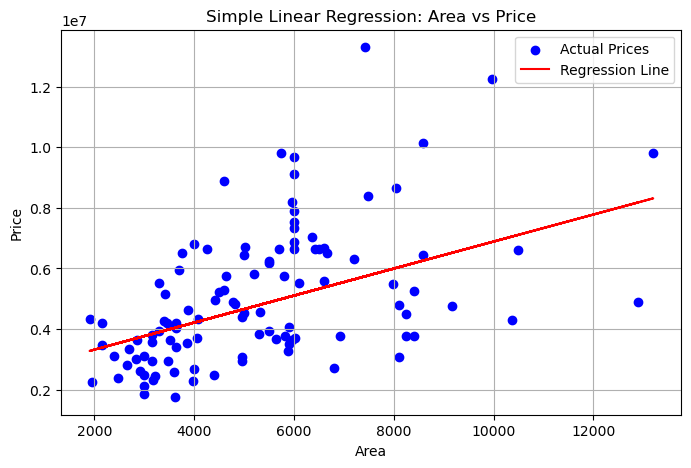


🔹 Simple Linear Regression using 'bedrooms'
Intercept: 2157253.7696121316
Coefficient: 861498.9924176146
MAE: 1546558.91
MSE: 4273666486082.68
R² Score: 0.1292


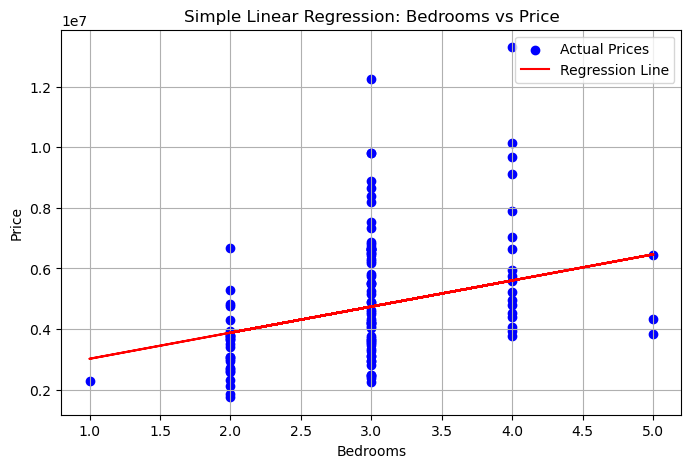


🔹 Simple Linear Regression using 'bathrooms'
Intercept: 2289476.7040210944
Coefficient: 1923023.2185234018
MAE: 1439908.99
MSE: 3643788438232.45
R² Score: 0.2575


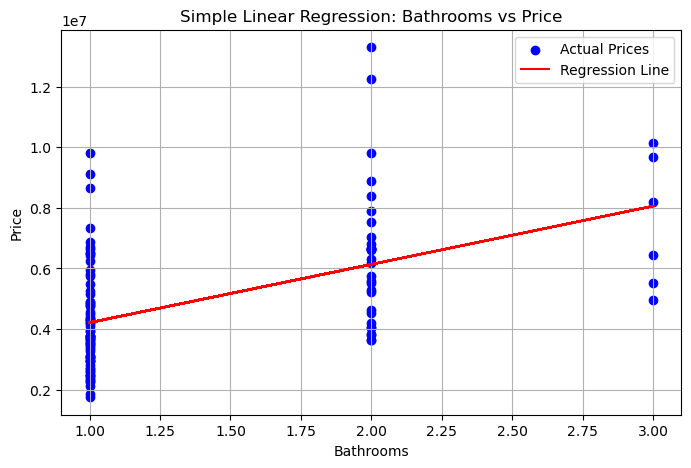


🔹 Simple Linear Regression using 'stories'
Intercept: 3226645.572563178
Coefficient: 823118.8101083031
MAE: 1460283.1
MSE: 3903528593155.73
R² Score: 0.2046


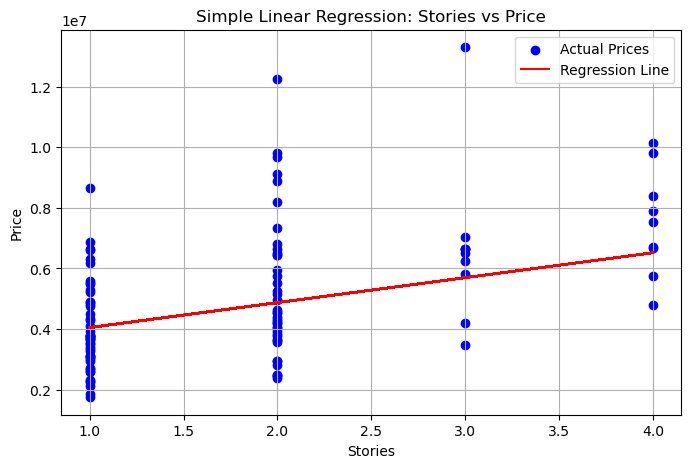

In [79]:
for feature in features:
    print(f"\n🔹 Simple Linear Regression using '{feature}'")

    X = df[[feature]]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print("Intercept:", model.intercept_)
    print("Coefficient:", model.coef_[0])
    print("MAE:", round(mae, 2))
    print("MSE:", round(mse, 2))
    print("R² Score:", round(r2, 4))

    plt.figure(figsize=(8, 5))
    plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
    plt.plot(X_test, y_pred, color='red', label='Regression Line')
    plt.xlabel(feature.capitalize())
    plt.ylabel("Price")
    plt.title(f"Simple Linear Regression: {feature.capitalize()} vs Price")
    plt.legend()
    plt.grid(True)
    plt.show()

In [80]:
X_train, X_test, y_train, y_test = train_test_split(
    X_multi, y, test_size=0.2, random_state=42
)

print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Training features shape: (435, 4)
Testing features shape: (109, 4)
Training labels shape: (435,)
Testing labels shape: (109,)


In [81]:
model = LinearRegression()

# Fit the model on training data
model.fit(X_train, y_train)


LinearRegression()

In [82]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("R² Score:", round(r2, 4))


Model Evaluation Metrics:
Mean Absolute Error (MAE): 1122199.36
Mean Squared Error (MSE): 2258238004850.15
R² Score: 0.5398


In [83]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [84]:
# Coefficients and intercept
print("Intercept (β₀):", model.intercept_)
print("Coefficients (β):", model.coef_)

# Match them with feature names
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")


Intercept (β₀): -36187.83335262723
Coefficients (β): [3.67100732e+02 1.67426529e+05 1.20545416e+06 4.72555198e+05]
stories: 367.10


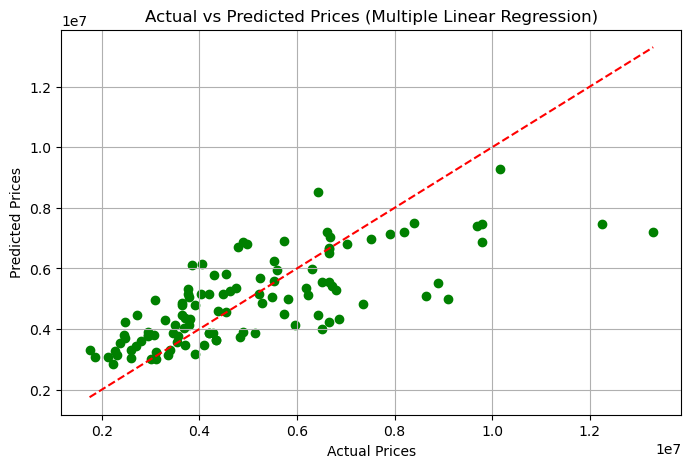

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='green')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Multiple Linear Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.grid(True)
plt.show()


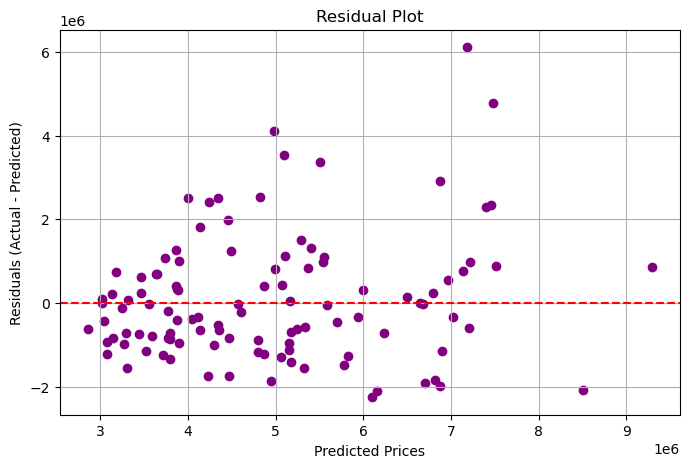

In [86]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()
